In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math
import random

In [66]:
np.random.seed(5)

In [67]:
def convol_window(input_window, kernel,bias):
  ans = np.sum(np.multiply(input_window,kernel))
  ans+= bias
  return ans

In [68]:
input_window = np.random.randn(2, 2)

print("input window : ", input_window)
kernel = np.random.randn(2, 2)
bias = np.random.randn(1,1)
print("kernel : ", kernel)
ans = convol_window(input_window, kernel,bias)
print("convolution operation on given window of matrix =", ans)
# ans = create_mask(input_window)
# print("convolution operation on given window of matrix =", ans)

input window :  [[ 0.44122749 -0.33087015]
 [ 2.43077119 -0.25209213]]
kernel :  [[ 0.10960984  1.58248112]
 [-0.9092324  -0.59163666]]
convolution operation on given window of matrix = [[-2.34861865]]


In [69]:
def zero_padding(input,padding):
  start = padding
  end_a = input.shape[0] + start
  end_b = input.shape[1] + start
  if(len(input.shape)==2):
    output_shape = (input.shape[0] + 2*padding, input.shape[1] + 2*padding)
    result = np.zeros(output_shape) 
    start = padding
    end_a = input.shape[0] + start
    end_b = input.shape[1] + start
    result[start : end_a, start : end_b] = input
    return result
  elif(len(input.shape)==3):
    output_shape = (input.shape[0] + 2*padding, input.shape[1] + 2*padding, input.shape[2])
    result = np.zeros(output_shape) 
    for i in range(input.shape[2]):
        result[start : end_a, start : end_b, i] = input[:,:,i]
    return result
  elif(len(input.shape)==4):
    output_shape = (input.shape[0], input.shape[1] + 2*padding, input.shape[2] + 2*padding, input.shape[3])
    result = np.zeros(output_shape) 
    start = padding
    end_a = input.shape[1] + start
    end_b = input.shape[2] + start
    for i in range(input.shape[0]):
        result[i,start : end_a, start : end_b, :] = input[i,:,:,:]
    for i in range(input.shape[3]):
        result[:,start : end_a, start : end_b, i] = input[:,:,:,i]
    return result

input shape = (10, 4, 4, 2)
padded input shape = (10, 8, 8, 2)
[[[[ 0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00]
   ...
   [ 0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00]]

  [[ 0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00]
   ...
   [ 0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00]]

  [[ 0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00]
   [-4.16757847e-01 -5.62668272e-02]
   ...
   [ 5.02881417e-01 -1.24528809e+00]
   [ 0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00]]

  ...

  [[ 0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00]
   [-3.38821966e-01 -2.36184031e-01]
   ...
   [-2.69056960e-01  2.23136679e+00]
   [ 0.00000000e+00  0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00]]

  [[ 0

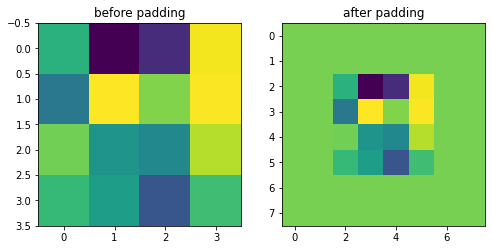

In [70]:
np.random.seed(2)
from pylab import *
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 4.0) 
input = np.random.randn(10,4,4,2)
input_pad = zero_padding(input, 2)
print ("input shape =", input.shape)
print ("padded input shape =", input_pad.shape)
print(input_pad)
fig, axarr = plt.subplots(1,2)
axarr[0].set_title('before padding')
axarr[1].set_title('after padding')
if(len(input.shape)==2):
  axarr[0].pcolormesh(input)
  axarr[1].pcolormesh(input_pad)
elif(len(input.shape)==3):
  input = input.reshape(input.shape[0],input.shape[1]*input.shape[2])
  input_pad = input_pad.reshape(input_pad.shape[0],input_pad.shape[1]*input_pad.shape[2])
  axarr[0].pcolormesh(input)
  axarr[1].pcolormesh(input_pad)
else:
  axarr[0].set_title('before padding')
  axarr[0].imshow(input[0,:,:,0])
  axarr[1].set_title('after padding')
  axarr[1].imshow(input_pad[0,:,:,0])

In [71]:
def convol_forward(input,kernel,bias,stride,padding): 
  print("input shape:",input.shape)
  o_dim0 = input.shape[0]
  o_dim1 = int((input.shape[1] - kernel.shape[0] + 2*padding)/stride + 1)
  o_dim2 = int((input.shape[2] - kernel.shape[0] + 2*padding)/stride + 1)
  o_dim3 = kernel.shape[3]
  output = np.zeros([o_dim0, o_dim1, o_dim2, o_dim3])
  print("output shape:",output.shape)
  input_pad = zero_padding(input,padding)
  print("after padding:",input_pad.shape)
  i=0
  while(i<o_dim0):                           
    input_i = input_pad[i,:,:,:]   
    print("i input",input_i.shape)  
    l=0                         
    while(l < o_dim1):
      par1 = stride*l 
      b=0                         
      while(b < o_dim2):
        par2 = stride*b
        h=0
        while(h < o_dim3):                   
          input_slice = input_i[par1:par1+kernel.shape[0],par2:par2 + kernel.shape[0],:]
          #print("slice", input_slice.shape)
          #print("kernel",kernel[:, :, :, h].shape)
          output[i, l, b, h] = convol_window(input_slice,kernel[:, :, :, h],bias[:,:,:,h])
          h+=1
        #print("loop 1 over")
        #print("3", o_dim3," ",h)
        b+=1
      #print("loop 2 over")
      #print("2", o_dim2," ",b)
      l+=1
    #print("loop 3 over")
    #print("1", o_dim1," ",l)
    i+=1
  #print("0", o_dim0," ",i)
  o_kernel = kernel
  o_stride = stride
  o_padding = padding
  return output,input,o_kernel,bias,o_stride,o_padding

In [72]:
input = np.random.randn(8,3,3,2)
W = np.random.randn(2,2,2,6)
b = np.random.randn(1,1,1,6)
stride = 2 
padding = 2
output,input,kernel,bias,stride,padding = convol_forward(input, W,b, 2,2)
print("forward propogation done")
print("output -", output)

input shape: (8, 3, 3, 2)
output shape: (8, 3, 3, 6)
after padding: (8, 7, 7, 2)
i input (7, 7, 2)
i input (7, 7, 2)
i input (7, 7, 2)
i input (7, 7, 2)
i input (7, 7, 2)
i input (7, 7, 2)
i input (7, 7, 2)
i input (7, 7, 2)
forward propogation done
output - [[[[ 1.28876941  0.13492546 -1.77860064 -0.50079149 -1.08816157
    -0.75785555]
   [ 1.28876941  0.13492546 -1.77860064 -0.50079149 -1.08816157
    -0.75785555]
   [ 1.28876941  0.13492546 -1.77860064 -0.50079149 -1.08816157
    -0.75785555]]

  [[ 1.28876941  0.13492546 -1.77860064 -0.50079149 -1.08816157
    -0.75785555]
   [-3.83138104  3.84173918 -3.20186006 -6.03694848  0.66139509
     2.67027984]
   [ 0.44355282 -0.40968544 -3.81737913 -2.62161851 -2.0751889
    -1.66846339]]

  [[ 1.28876941  0.13492546 -1.77860064 -0.50079149 -1.08816157
    -0.75785555]
   [ 1.14799534 -3.42623099 -1.8136811  -1.54295833  0.51664569
    -1.91371549]
   [ 2.6192484  -0.25696576 -2.63696441 -1.47768579 -0.44601863
     0.19775293]]]


 [[[ 

In [73]:
def convol_backward(f_output,f_input,kernel,bias,stride,padding):
    d_input = np.zeros((f_output.shape[0], f_input.shape[1], f_input.shape[2], f_input.shape[3]))                           
    d_kernel = np.zeros(kernel.shape)
    d_bias = np.zeros((1, 1, 1, kernel.shape[3]))
    # print("d_input",d_input.shape)
    # print("d_kernel",d_kernel.shape)
    # print("d_bias",d_bias.shape)

    # Pad A_prev and dA_prev
    input_pad = zero_padding(f_input, padding)
    d_input_pad = zero_padding(d_input, padding)
    # print("input_pad",input_pad.shape)
    # print("d_input_pad",d_input_pad.shape)
    f_s=kernel.shape[0]
    i=0
    while(i < f_output.shape[0]):                           
      input_i = input_pad[i]   
      d_input_i = d_input_pad[i] 
      # print("input_pad",input_pad.shape)
      # print("d_input_pad",d_input_pad.shape) 
      l=0                         
      while(l < f_output.shape[1]): 
        b=0                         
        while(b < f_output.shape[2]):
          h=0
          while(h < f_output.shape[3]): 
            input_slice = input_i[l:l+f_s, b: b+f_s, :]
            # print("input_slice",input_slice.shape)
            # print("kernel[:,:,:,h]",kernel[:,:,:,h].shape)
            # print("f_output[i, l, b, h]",f_output[i, l, b, h].shape)
            d_input_i[l:l+f_s, b: b+f_s, :] += kernel[:,:,:,h] * f_output[i, l, b, h]
            # print("d_input_i[l:l+f_s, b: b+f_s, :]",d_input_i[l:l+f_s, b: b+f_s, :].shape)
            temp = input_slice * f_output[i, l, b, h]
            d_kernel[:,:,:,h] += temp
            d_bias[:,:,:,h] += f_output[i, l, b, h]
            h+=1
          b+=1
        l+=1
      d_input[i, :, :, :] = d_input_i[padding:-padding, padding:-padding, :]
      i+=1
    return d_input, d_kernel, d_bias

In [74]:
np.random.seed(1)
d_output, d_kernel, d_bias = convol_backward(output,input,kernel,bias,stride,padding)
print("d_output",d_output.shape)
print("d_kernel",d_kernel.shape)
print("d_bias",d_bias.shape)



d_output (8, 3, 3, 2)
d_kernel (2, 2, 2, 6)
d_bias (1, 1, 1, 6)


In [75]:
def mask(input_window):
  output = np.zeros(input_window.shape, dtype=int)
  ind = np.argwhere(input_window == input_window.max()) 
  print(ind)
  output[ind[0][0]][ind[0][1]] = 1
  return output

input : [[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
   1.74481176]
 [-0.7612069   0.3190391  -0.24937038  1.46210794 -2.06014071 -0.3224172
  -0.38405435]
 [ 1.13376944 -1.09989127 -0.17242821 -0.87785842  0.04221375  0.58281521
  -1.10061918]
 [ 1.14472371  0.90159072  0.50249434  0.90085595 -0.68372786 -0.12289023
  -0.93576943]
 [-0.26788808  0.53035547 -0.69166075 -0.39675353 -0.6871727  -0.84520564
  -0.67124613]
 [-0.0126646  -1.11731035  0.2344157   1.65980218  0.74204416 -0.19183555
  -0.88762896]]
[[0 6]]
mask :  [[0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


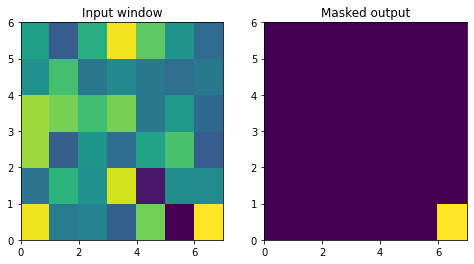

In [76]:
input_window = np.random.randn(6,7)

print("input :", input_window)

input_mask = mask(input_window)

print("mask : ", input_mask)
plt.rcParams['figure.figsize'] = (8.0, 4.0) 
fig, axarr = plt.subplots(1,2)
axarr[0].set_title('Input window')
axarr[1].set_title('Masked output')
axarr[0].pcolormesh(input_window)
axarr[1].pcolormesh(input_mask)

In [77]:
def distribute_value(input_window):
    average = np.sum(input_window) / (input_window.shape[0] * input_window.shape[1])
    output = np.ones(input_window.shape) * average
    return output,average

In [78]:
input_window = np.random.randn(2,2)
print("input :", input_window)
input_dv = distribute_value(input_window)
print("dv : ", input_dv)

input : [[-0.74715829  1.6924546 ]
 [ 0.05080775 -0.63699565]]
dv :  (array([[0.0897771, 0.0897771],
       [0.0897771, 0.0897771]]), 0.08977710387089613)


In [79]:
def pool_forward(input,f_s,stride,pool_type):
  print("input shape:",input.shape)
  o_dim0 = input.shape[0]
  o_dim1 = int((input.shape[1] - f_s)/stride + 1)
  o_dim2 = int((input.shape[2] - f_s)/stride + 1)
  o_dim3 = input.shape[3]
  output = np.zeros([o_dim0, o_dim1, o_dim2, o_dim3])
  print("output shape:",output.shape)
  #max pool
  if(pool_type == 1):
    i=0
    while(i<o_dim0):                           
      input_i = input_pad[i,:,:,:]   
      #print("i input",input_i.shape)  
      l=0                         
      while(l < o_dim1):
        par1 = stride*l 
        b=0                         
        while(b < o_dim2):
          par2 = stride*b
          h=0
          while(h < o_dim3):                  
            input_slice = input[i,par1:par1+f_s,par2:par2 + f_s,h]
            #print("slice", input_slice.shape)
            #print("kernel",kernel[:, :, :, h].shape)
            output[i, l, b, h] = np.max(input_slice)
            h+=1
          #print("loop 1 over")
          #print("3", o_dim3," ",h)
          b+=1
        #print("loop 2 over")
        #print("2", o_dim2," ",b)
        l+=1
      #print("loop 3 over")
      #print("1", o_dim1," ",l)
      i+=1
  #avg pool
  else:
    i=0
    while(i<o_dim0):                           
      input_i = input_pad[i,:,:,:]   
      #print("i input",input_i.shape)  
      l=0                         
      while(l < o_dim1):
        par1 = stride*l 
        b=0                         
        while(b < o_dim2):
          par2 = stride*b
          h=0
          while(h < o_dim3):                   
            input_slice = input[i,par1:par1+f_s,par2:par2 + f_s,h]
            #print("slice", input_slice.shape)
            #print("kernel",kernel[:, :, :, h].shape)
            output[i, l, b, h] = np.mean(input_slice)
            h+=1
          #print("loop 1 over")
          #print("3", o_dim3," ",h)
          b+=1
        #print("loop 2 over")
        #print("2", o_dim2," ",b)
        l+=1
      #print("loop 3 over")
      #print("1", o_dim1," ",l)
      i+=1
  return output,input, f_s, stride,pool_type

In [80]:
input = np.random.randn(8,6,4,2)
output,input, f_s, stride,pool_type = pool_forward(input,2,1,1)
print("max pooling done")
print("output -", output)

input shape: (8, 6, 4, 2)
output shape: (8, 5, 3, 2)
max pooling done
output - [[[[ 8.38983414e-01  2.10025514e+00]
   [ 8.38983414e-01  9.31102081e-01]
   [ 3.00170320e-01  1.25286816e+00]]

  [[ 8.38983414e-01  9.31102081e-01]
   [ 1.13162939e+00  1.51981682e+00]
   [ 2.18557541e+00  1.51981682e+00]]

  [[ 5.12929820e-01  8.76168921e-01]
   [ 1.13162939e+00  1.51981682e+00]
   [ 2.18557541e+00  1.51981682e+00]]

  [[ 2.30094735e-01  8.76168921e-01]
   [ 3.15634947e-01  8.76168921e-01]
   [ 3.15634947e-01  8.27974643e-01]]

  [[ 2.30094735e-01  1.12948391e+00]
   [ 1.19891788e+00  1.12948391e+00]
   [ 1.19891788e+00  4.10051647e-01]]]


 [[[ 4.23494354e-01  5.93578523e-01]
   [ 7.40556451e-01  6.98032034e-01]
   [ 7.40556451e-01  1.22450770e+00]]

  [[ 8.46160648e-01  5.93578523e-01]
   [ 8.46160648e-01  1.69382433e-01]
   [ 7.40556451e-01  3.26145467e-02]]

  [[ 1.12141771e+00  4.08900538e-01]
   [ 1.27375593e+00  1.96710175e+00]
   [ 1.27375593e+00  1.96710175e+00]]

  [[ 1.62765075

In [81]:
input = np.random.randn(8,4,4,2)
output,input, f_s, stride,pool_type = pool_forward(input,2,2,2)
print("Average pooling done")
print("output -", output)

input shape: (8, 4, 4, 2)
output shape: (8, 2, 2, 2)
Average pooling done
output - [[[[ 0.82736157  0.27962732]
   [ 0.03052259  0.68015756]]

  [[-0.23993969  0.56976662]
   [-0.20677016 -0.29956769]]]


 [[[ 0.38852168  0.56195571]
   [-0.26247947 -0.15615902]]

  [[ 0.80111418 -0.25590946]
   [ 0.04334774  0.5872963 ]]]


 [[[-0.52720172 -0.79200397]
   [-0.99801313  0.17129065]]

  [[ 0.87189851 -0.09991108]
   [ 0.24485882  0.56820909]]]


 [[[ 0.58444836  0.01485605]
   [-0.2107919  -0.19828833]]

  [[-0.73981898 -0.91813254]
   [ 0.16706252  0.64427927]]]


 [[[-0.1917238   0.10464746]
   [-0.08485197  1.75102386]]

  [[ 0.14067803  0.06751907]
   [ 0.62117564 -0.70495389]]]


 [[[-0.40596231  0.82042262]
   [-0.42921026  0.35144408]]

  [[-0.42913479 -0.14175026]
   [ 0.5829002  -0.52328229]]]


 [[[ 0.233253    0.1617282 ]
   [ 0.19211607 -0.149868  ]]

  [[-0.58465613 -0.15489907]
   [ 0.21568641  0.92056626]]]


 [[[ 0.25564122 -0.42112952]
   [-0.41039327 -0.61560869]]

  [

In [82]:
def pool_backward(d_output, f_input, f_s, stride, pool_type):
    d_input = np.zeros(f_input.shape)
    #max pool
    if(pool_type == 1):
      i=0
      while(i< d_output.shape[0]):                           
        input_i = f_input[i]   
        #print("i input",input_i.shape)  
        l=0                         
        while(l < d_output.shape[1]):
          b=0                         
          while(b < d_output.shape[2]):
            h=0
            while(h < d_output.shape[3]):                  
              input_slice = input_i[l:l+f_s, b: b+f_s,h]
              #print("slice", input_slice.shape)
              #print("kernel",kernel[:, :, :, h].shape)
              mask_o = mask(input_slice)
              grad = np.multiply(mask_o,d_output[i,l,b,h])
              d_input[i,l:l+f_s, b: b+f_s,h] += grad
              h+=1
            #print("loop 1 over")
            #print("3", o_dim3," ",h)
            b+=1
          #print("loop 2 over")
          #print("2", o_dim2," ",b)
          l+=1
        #print("loop 3 over")
        #print("1", o_dim1," ",l)
        i+=1
    #avg pool
    else:
      i=0
      while(i<d_output.shape[0]):                           
        input_i = f_input[i]  
        #print("i input",input_i.shape)  
        l=0                         
        while(l < d_output.shape[1]):
          b=0                         
          while(b < d_output.shape[2]):
            h=0
            while(h < d_output.shape[3]):                   
              input_slice = input_i[l:l+f_s, b: b+f_s,h]
              #print("slice", input_slice.shape)
              #print("kernel",kernel[:, :, :, h].shape)
              x, avg = distribute_value(input_slice)
              grad = np.ones((f_s,f_s))*avg
              d_input[i,l:l+f_s, b: b+f_s,h] += grad
              h+=1
            #print("loop 1 over")
            #print("3", o_dim3," ",h)
            b+=1
          #print("loop 2 over")
          #print("2", o_dim2," ",b)
          l+=1
        #print("loop 3 over")
        #print("1", o_dim1," ",l)
        i+=1

    return d_input

In [89]:
input = np.random.randn(7,7,3,2)
output,input, f_s, stride,pool_type = pool_forward(input,2,1,1)
print("max pooling done")
#print("output -", output)
d_output = np.gradient(output)
d_output = np.array(d_output)
d_output = np.resize(d_output,output.shape)
print(d_output.shape)
print(output.shape)
print(input.shape)
pb_out = dA_prev = pool_backward(d_output, input, f_s, stride, pool_type)
print(pb_out.shape)

input shape: (7, 7, 3, 2)
output shape: (7, 6, 2, 2)
max pooling done
(7, 6, 2, 2)
(7, 6, 2, 2)
(7, 7, 3, 2)
[[0 0]]
[[1 0]]
[[1 1]]
[[1 0]]
[[1 1]]
[[0 0]]
[[1 0]]
[[1 1]]
[[0 1]]
[[0 0]]
[[0 0]]
[[1 1]]
[[1 0]]
[[1 0]]
[[0 1]]
[[0 1]]
[[1 0]]
[[1 0]]
[[1 1]]
[[0 1]]
[[0 0]]
[[1 1]]
[[0 1]]
[[1 0]]
[[0 0]]
[[0 1]]
[[0 0]]
[[0 1]]
[[1 1]]
[[1 0]]
[[1 1]]
[[1 0]]
[[1 1]]
[[1 0]]
[[1 0]]
[[0 0]]
[[0 1]]
[[0 0]]
[[0 0]]
[[0 0]]
[[1 0]]
[[1 1]]
[[0 1]]
[[1 0]]
[[1 0]]
[[1 0]]
[[0 0]]
[[1 0]]
[[1 0]]
[[0 1]]
[[1 0]]
[[0 1]]
[[0 0]]
[[1 1]]
[[1 1]]
[[1 1]]
[[0 0]]
[[1 1]]
[[0 1]]
[[0 1]]
[[1 1]]
[[0 1]]
[[1 1]]
[[0 0]]
[[1 1]]
[[1 1]]
[[1 1]]
[[1 0]]
[[1 0]]
[[1 0]]
[[0 1]]
[[1 1]]
[[0 1]]
[[0 0]]
[[0 0]]
[[0 0]]
[[1 0]]
[[1 0]]
[[1 1]]
[[1 0]]
[[0 0]]
[[0 0]]
[[0 1]]
[[0 0]]
[[0 0]]
[[0 0]]
[[0 0]]
[[0 1]]
[[1 0]]
[[1 1]]
[[1 1]]
[[1 0]]
[[1 1]]
[[0 1]]
[[1 0]]
[[0 0]]
[[0 0]]
[[1 0]]
[[0 0]]
[[1 0]]
[[1 0]]
[[0 0]]
[[1 0]]
[[0 0]]
[[0 0]]
[[1 0]]
[[0 0]]
[[0 1]]
[[1 0]]
[[0 0]]
[[0 0]]
[[1

In [84]:
input = np.random.randn(8,4,4,2)
output,input, f_s, stride,pool_type = pool_forward(input,2,2,2)
print("Average pooling done")
print("output -", output)
d_output = np.gradient(output)
d_output = np.array(d_output)
d_output = np.resize(d_output,output.shape)
print(d_output.shape)
print(output.shape)
print(input.shape)
pb_out = pool_backward(d_output, input, f_s, stride, pool_type)
print(pb_out.shape)


input shape: (8, 4, 4, 2)
output shape: (8, 2, 2, 2)
Average pooling done
output - [[[[-0.06684482  0.54631399]
   [ 0.60129866 -0.06266484]]

  [[ 0.0373544   0.56064751]
   [ 0.34092472 -0.15628473]]]


 [[[ 0.56915942 -0.39304272]
   [ 0.52806365  0.80001725]]

  [[-1.45849615  0.59981556]
   [ 0.0430455  -1.03598711]]]


 [[[ 0.782602    0.39167562]
   [ 0.39934798 -0.09552751]]

  [[-0.44316468 -0.47548483]
   [ 1.12422288  0.10626166]]]


 [[[ 0.22429612  0.00481663]
   [ 0.41999139 -0.07133549]]

  [[ 0.6214183   0.15430138]
   [-0.18098795 -0.08251532]]]


 [[[-0.21957003 -0.64046281]
   [-0.46024666 -0.39109085]]

  [[ 0.09648576 -0.38853532]
   [ 0.42337219  0.32838477]]]


 [[[-1.07483353 -0.12981313]
   [ 0.39107777 -0.64835996]]

  [[-0.10745617 -0.02985339]
   [-0.16740504  0.19465737]]]


 [[[ 0.52902221 -0.29959131]
   [ 0.1998911   0.06616267]]

  [[-0.52042944  0.16857224]
   [ 0.31342375  0.16613431]]]


 [[[-0.67879877 -0.08144036]
   [ 0.61841609  0.06959513]]

  [

In [86]:
input = np.random.randn(8,3,3,2)
W = np.random.randn(2,2,2,6)
b = np.random.randn(1,1,1,6)
stride = 2 
padding = 2
output,input,kernel,bias,stride,padding = convol_forward(input, W,b, 2,2)
print(output.shape)
d_output, d_kernel, d_bias = convol_backward(output,input,kernel,bias,stride,padding)
print(d_output.shape)
output,input,kernel,bias,stride,padding = convol_forward(d_output, d_kernel,d_bias, 2,2)
print(output.shape)
d_output, d_kernel, d_bias = convol_backward(output,input,kernel,bias,stride,padding)
print(d_output.shape)


input shape: (8, 3, 3, 2)
output shape: (8, 3, 3, 6)
after padding: (8, 7, 7, 2)
i input (7, 7, 2)
i input (7, 7, 2)
i input (7, 7, 2)
i input (7, 7, 2)
i input (7, 7, 2)
i input (7, 7, 2)
i input (7, 7, 2)
i input (7, 7, 2)
(8, 3, 3, 6)
(8, 3, 3, 2)
input shape: (8, 3, 3, 2)
output shape: (8, 3, 3, 6)
after padding: (8, 7, 7, 2)
i input (7, 7, 2)
i input (7, 7, 2)
i input (7, 7, 2)
i input (7, 7, 2)
i input (7, 7, 2)
i input (7, 7, 2)
i input (7, 7, 2)
i input (7, 7, 2)
(8, 3, 3, 6)
(8, 3, 3, 2)
